In [1]:
import pandas as pd
import numpy as np


# programme N0 - 1

In [2]:
add = pd.read_csv(r"D:\python 2\Data Set\Advertising.csv")

In [3]:
add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
#check null value

In [5]:
add.isnull().head()

,Unnamed: 0,TV,radio,newspaper,sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [6]:
add.isnull().values.any()

False

In [7]:
add.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [8]:
add.isnull().sum().sum()

0

In [9]:
add.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [10]:
def info(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean()],index = ["count", "null value", "sum value", "mean"])
add.apply(lambda x : info(x))

,Unnamed: 0,TV,radio,newspaper,sales
count,200.0,200.0000,200.000,200.000,200.0000
null value,0.0,0.0000,0.000,0.000,0.0000
sum value,20100.0,29408.5000,4652.800,6110.800,2804.5000
mean,100.5,147.0425,23.264,30.554,14.0225


In [11]:
add.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
add = add.drop(columns = ['Unnamed: 0'])

In [13]:
add.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [14]:
import seaborn as sns

C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


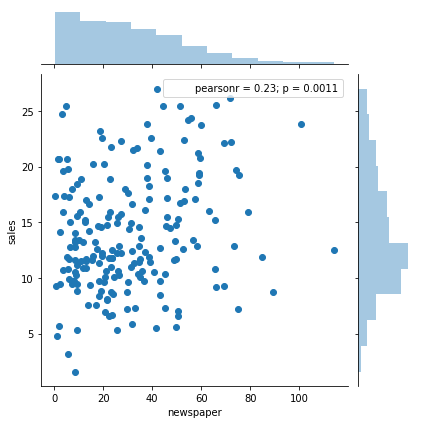

In [15]:
sns.jointplot(add.newspaper, add.sales)

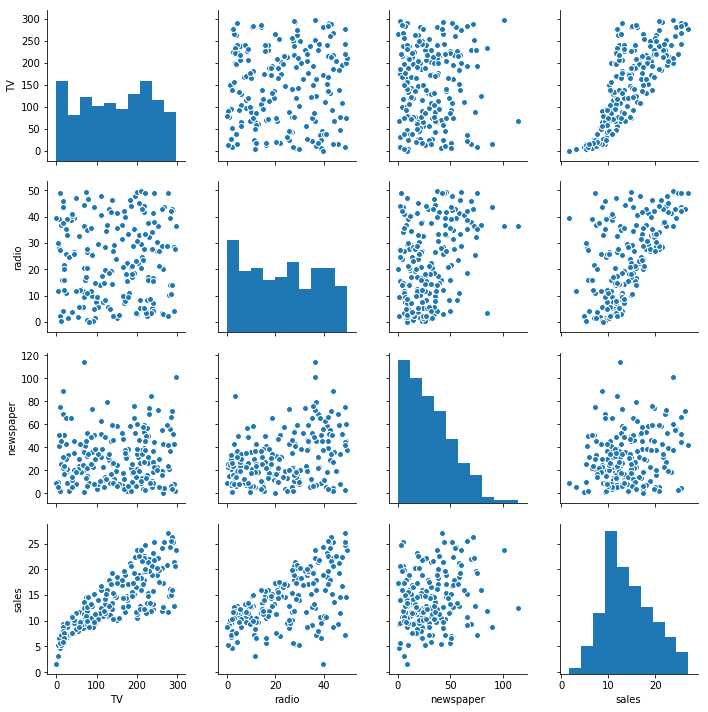

In [16]:
sns.pairplot(add)

#  calculation corelations

In [17]:
add.TV.corr(add.sales)

0.7822244248616066

In [18]:
add.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


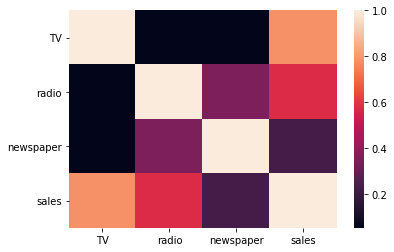

In [19]:
sns.heatmap(add.corr())

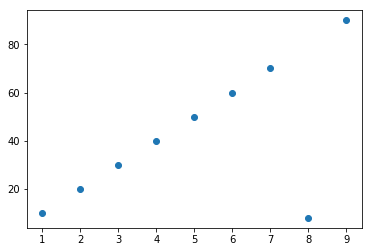

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x = pd.Series([1,2,3,4,5,6,7,8,9])
y = pd.Series([10,20,30,40,50,60,70,8,90])
plt.scatter(x,y)


In [21]:
x.corr(y)

0.6251717321316508

C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


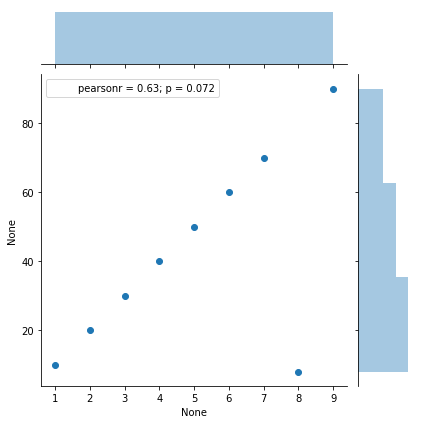

In [22]:
sns.jointplot(x,y)

In [23]:
#{"col1":[1,2,3,4,5,6,7,8,9]} {"col2":[100,20,300,40,500,60,700,80,900]}
z = pd.DataFrame({"col1":[1,2,3,4,5,6,7,8,9],"col2":[50000,20,9000,40,8000,60, 1000,80,2000]});z

,col1,col2
0,1,50000
1,2,20
2,3,9000
3,4,40
4,5,8000
5,6,60
6,7,1000
7,8,80
8,9,2000


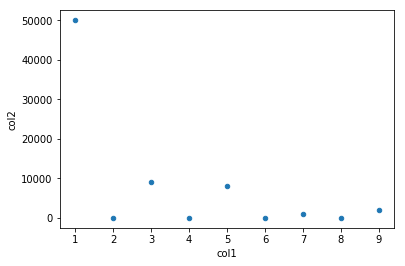

In [24]:
a = z.plot.scatter(x= "col1", y= "col2")

In [25]:
z.corr()

,col1,col2
col1,1.000000,-0.585069
col2,-0.585069,1.000000


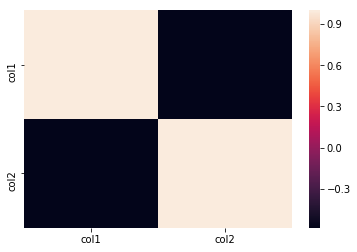

In [26]:

sns.heatmap(z.corr())

In [27]:
get_ipython().run_line_magic('pinfo', 'sns.pairplot')


In [28]:
import statsmodels.formula.api as smf

In [29]:
add.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [30]:
lr = smf.ols("sales ~ TV", add).fit()

In [31]:
lr

In [32]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 08 Jan 2019   Prob (F-statistic):           1.47e-42
Time:                        16:47:37   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# f value

In [33]:
lr.f_pvalue

1.467389700194647e-42

# model parameter

In [34]:
lr.params

Intercept    7.032594
TV           0.047537
dtype: float64

# confidence interval

In [35]:
lr.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [36]:
lr.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [37]:
lr.rsquared

0.611875050850071

In [38]:
round(float(lr.rsquared),2)

0.61

In [39]:
round(float(lr.rsquared),3)

0.612

In [40]:
lr.predict

<bound method Results.predict of <statsmodels.regression.linear_model.OLSResults object at 0x0B691AB0>>

In [41]:
fit.predict(example_df["c"])


NameError: name 'fit' is not defined

In [43]:
impredict = lr.predict({"TV": add.TV})

In [44]:
impredict

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
5       7.446162
6       9.765950
7      12.746498
8       7.441409
9      16.530414
10     10.174765
11     17.238710
12      8.163966
13     11.667416
14     16.734822
15     16.321253
16     10.255578
17     20.409404
18     10.322129
19     14.034741
20     17.414596
21     18.317792
22      7.660077
23     17.885209
24      9.994126
25     19.529976
26     13.825579
27     18.446141
28     18.859710
29     10.388680
         ...    
170     9.409426
171    14.852371
172     7.964312
173    15.037764
174    17.604742
175    20.195489
176    18.840695
177    15.123330
178    20.185982
179    14.904661
180    14.476831
181    17.419349
182     9.704153
183    20.704131
184    19.097393
185    16.777605
186    13.663955
187    16.116846
188    20.628073
189     7.921529
190     8.910291
191    10.621610
192     7.850224
193    14.961705
194    14.148829
195     8.848493
196    11.510545
197    15.4465

In [45]:
from sklearn import metrics

# RMSE

In [46]:
mse  = metrics.mean_squared_error(add.sales, impredict)

In [47]:

mse

10.512652915656759

In [48]:
from math import *
rmse = sqrt(mse)

In [49]:
rmse

3.2423221486546887

In [50]:
from sklearn import *


C:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\anaconda\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


# to get residuals

In [51]:
lr.resid

0      4.129225
1      1.252026
2      1.449776
3      4.265605
4     -2.727218
5     -0.246162
6      2.034050
7      0.453502
8     -2.641409
9     -5.930414
10    -1.574765
11     0.161290
12     1.036034
13    -1.967416
14     2.265178
15     6.078747
16     2.244422
17     3.990596
18     0.977871
19     0.565259
20     0.585404
21    -5.817792
22    -2.060077
23    -2.385209
24    -0.294126
25    -7.529976
26     1.174421
27    -2.546141
28     0.040290
29     0.111320
         ...   
170   -1.009426
171   -0.352371
172   -0.364312
173   -3.337764
174   -6.104742
175    6.804511
176    1.359305
177   -3.423330
178   -8.385982
179   -2.304661
180   -3.976831
181   -5.219349
182   -1.004153
183    5.495869
184   -1.497393
185    5.822395
186   -3.363955
187    1.183154
188   -4.728073
189   -1.221529
190    1.889709
191   -0.721610
192   -1.950224
193    4.638295
194    3.151171
195   -1.248493
196   -1.810545
197   -2.646579
198    4.986015
199   -4.665848
Length: 200, dtype: floa

C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


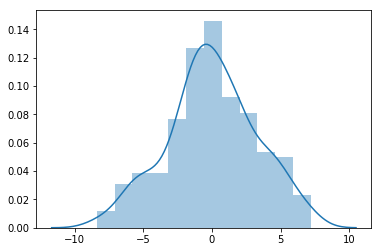

In [52]:
sns.distplot(lr.resid)

C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


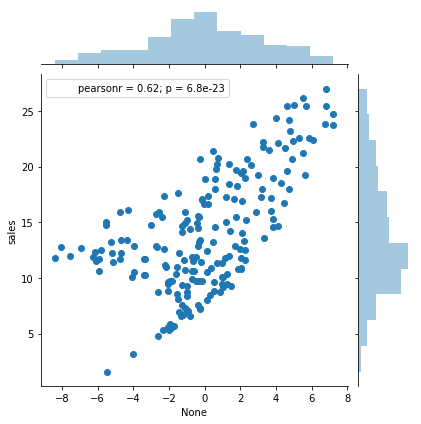

In [53]:
sns.jointplot(lr.resid, add.sales)

In [54]:
# from sklearn.linear_model import *
from sklearn.linear_model import LinearRegression

In [55]:
from sklearn.cross_validation import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(add[["TV"]], add.sales, test_size = 0.2)

In [57]:
print (len(x_train), len(y_train))
print(len(x_test),len(y_test))

160 160
40 40


In [58]:
# modell fittingl
lir = LinearRegression()
model = lir.fit(x_train, y_train)
y_pred = lir.predict(x_test)

In [59]:
y_pred

array([ 9.38837762,  7.10126318, 11.41024685,  8.05214227,  7.68179989,
       18.13646526, 21.25935237, 19.26751091, 17.54091467, 19.98317254,
        7.96706362, 10.99986745, 18.01134959, 18.32664107, 21.20930611,
       11.52535326, 17.73609511, 18.71199734, 13.47715771, 20.0682512 ,
       10.38429836,  7.99208675, 12.74147758, 15.34388351, 14.99856426,
       10.52943253, 13.00171817, 17.4908684 , 17.39578049, 18.08141436,
        8.86789644, 13.30199578, 20.55870462,  8.68772987, 18.19652078,
       19.85805687,  7.1413002 , 18.63192331, 15.56909171, 20.93905626])

In [60]:
# polt the value

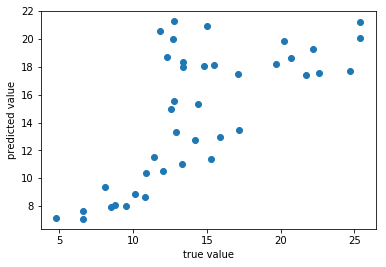

In [61]:
plt.scatter(y_test, y_pred)
plt.xlabel("true value")
plt.ylabel("predicted value")
plt.show()

In [62]:
from sklearn import metrics
rmse  = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

3.7893248720788435

# score 

In [63]:
metrics.r2_score(y_test, y_pred)

0.468569503225598

In [64]:
print("model:", model.score(x_test, y_test))

model: 0.468569503225598


# residuals 

In [66]:
res = y_test - y_pred

In [67]:
res

60    -1.288378
126   -0.501263
156    3.889753
72     0.747858
119   -1.081800
23    -2.636465
35    -8.459352
93     2.932489
52     5.059085
131   -7.283173
44     0.532936
161    2.300133
110   -4.611350
199   -4.926641
98     4.190694
144   -0.125353
128    6.963905
81    -6.411997
99     3.722842
36     5.331749
140    0.515702
136    1.507913
77     1.458522
160   -0.943884
179   -2.398564
86     1.470567
118    2.898282
168   -0.390868
84     4.304220
48    -3.281414
38     1.232104
159   -0.401996
178   -8.758705
190    2.112270
124    1.503479
54     0.341943
8     -2.341300
104    2.068077
197   -2.769092
169   -5.939056
Name: sales, dtype: float64

C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


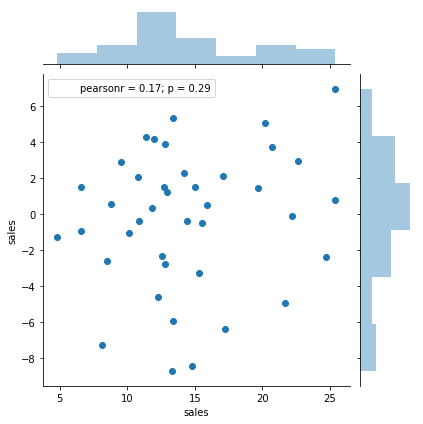

In [68]:
sns.jointplot(add.sales, res)

C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


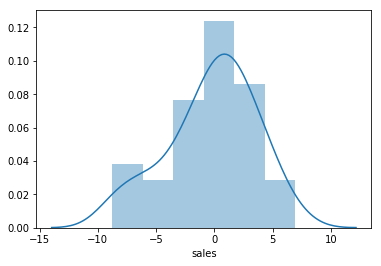

In [70]:
sns.distplot(res)

# Q-Q plot shows if the residuals are plotted along the line.

In [71]:
from scipy import stats
import pylab

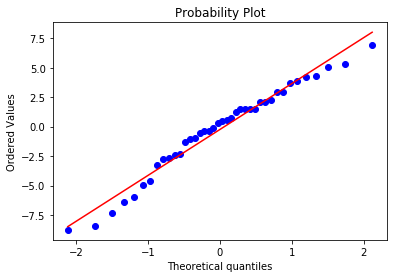

In [73]:
stats.probplot(res, dist = "norm", plot = pylab)
pylab.show()

# cross validations
### I’ve loaded in the data, split it into a training and testing sets, fitted a regression model to the training data, made predictions based on this data and tested the predictions on the test data.
###  But train/test split does have its dangers — what if the split we make isn’t random
### What if one subset of our data has only people from a certain state, employees with a certain income level but not other income levels, only women or only people at a certain age?
### This will result in overfitting, even though we’re trying to avoid it! This is where cross validation comes in.

### There are a bunch of cross validation methods, I’ll go over two of them: the first is
1. K-Folds Cross Validation
2. Leave One Out Cross Validation (LOOCV)


# K-Folds Cross Validation

### In K-Folds Cross Validation we split our data into k different subsets (or folds). 
###  We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data.

# EXAMPLE

In [75]:
from sklearn.model_selection import KFold

In [76]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4])                     # Create another array

kf = KFold(n_splits=2)                         # Define the split - into 2 folds 

kf.get_n_splits(X)          # returns the number of splitting iterations in the cross-validator

print(kf) 

KFold(n_splits=2, random_state=None, shuffle=False)


In [77]:
for train_index  in kf.split(x):
    print("train:", train_index)

train: (array([5, 6, 7, 8]), array([0, 1, 2, 3, 4]))
train: (array([0, 1, 2, 3, 4]), array([5, 6, 7, 8]))


In [79]:
for test_index in kf.split(y):
    print("test:", test_index)

test: (array([2, 3]), array([0, 1]))
test: (array([0, 1]), array([2, 3]))


# Leave One Out Cross Validation (LOOCV)

### the number of folds (subsets) equals to the number of observations we have in the dataset

In [85]:
from sklearn.model_selection import LeaveOneOut

In [86]:
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)

    



2

In [88]:

for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)

TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


In [91]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

### Perform 6-fold cross validation

In [95]:
score = cross_val_score(model, add.radio, add.sales,add.TV, cv = 6)
print("cross validation score:", score)

ValueError: scoring value should either be a callable, string or None. 0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
5        8.7
6       57.5
7      120.2
8        8.6
9      199.8
10      66.1
11     214.7
12      23.8
13      97.5
14     204.1
15     195.4
16      67.8
17     281.4
18      69.2
19     147.3
20     218.4
21     237.4
22      13.2
23     228.3
24      62.3
25     262.9
26     142.9
27     240.1
28     248.8
29      70.6
       ...  
170     50.0
171    164.5
172     19.6
173    168.4
174    222.4
175    276.9
176    248.4
177    170.2
178    276.7
179    165.6
180    156.6
181    218.5
182     56.2
183    287.6
184    253.8
185    205.0
186    139.5
187    191.1
188    286.0
189     18.7
190     39.5
191     75.5
192     17.2
193    166.8
194    149.7
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64 was passed

In [99]:
score = cross_val_score(model, add, add.sales, cv = 6)
print("cross validation score:", score)

cross validation score: [1. 1. 1. 1. 1. 1.]


In [100]:
prediction = cross_val_predict(model, add, add.sales, cv = 6);prediction

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

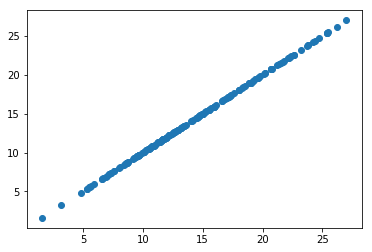

In [101]:
plt.scatter(add.sales, prediction)

In [103]:
from sklearn.feature_selection import f_regression

In [109]:
F_values , p_values = f_regression(x_train, y_train)

F_values

ValueError: Found input variables with inconsistent numbers of samples: [160, 1]

In [110]:
F_values, p_values  = f_regression(  X_train, y_train )

F_values

C:\anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


array([nan, nan])

In [111]:
p_values

array([nan, nan])

In [112]:
["%.3f" % p for p in p_values]

['nan', 'nan']

# progranmme no -2

In [22]:
import pandas as pd
df = pd.DataFrame()
df["x"] = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
df["y"] = [10,12,20,22,21,25,30,21,32,34,35,30,50,45,55,60,66,64,67,72,74,80,79,84]

In [23]:
df.head()

,x,y
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


In [33]:
from matplotlib.pyplot import*
import seaborn as sns

Text(10.05,0.5,'independent')

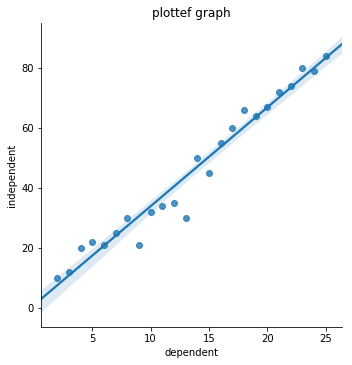

In [30]:
sns.lmplot("x","y" , data = df)
title("plottef graph")
xlabel("dependent")
ylabel("independent")
#sns.show()

In [31]:
x = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
y = [10,12,20,22,21,25,30,21,32,34,35,30,50,45,55,60,66,64,67,72,74,80,79,84]

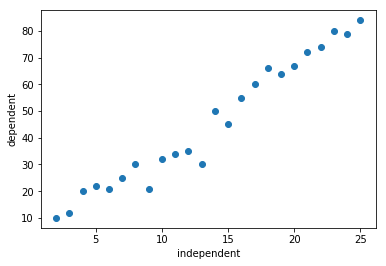

In [40]:
scatter(x , y)
xlabel("independent")
ylabel("dependent")
show()

# 1.slope formula(m)


In [42]:
####  (mean(x) * mean(y) – mean(x*y)) / ( mean (x)^2 – mean( x^2))

# 2.intercept formula(c)


In [43]:
#### mean(y) – mean(x) * m

In [68]:
from statistics import mean 
x_= mean(x)
y_ = mean(y)

### If Yi is the actual data point and
### (Y hat of i) is the predicted value by the equation of line then
### RMSE is the square root of (Yi – Y hat of i)**2

In [72]:
print(x_)
print(y_)

13.5
45.333333333333336


In [78]:
df = pd.DataFrame()
df["x"] = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
df["y"] = [10,12,20,22,21,25,30,21,32,34,35,30,50,45,55,60,66,64,67,72,74,80,79,84]
df

,x,y
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21
5,7,25
6,8,30
7,9,21
8,10,32
9,11,34


C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


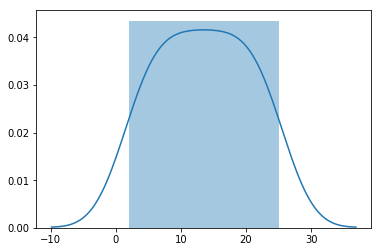

In [79]:
sns.distplot(x)

C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


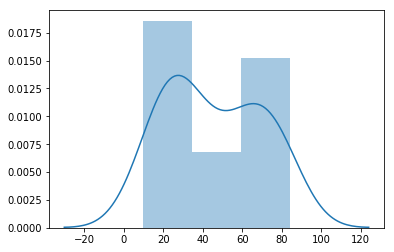

In [80]:
sns.distplot(y)

C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


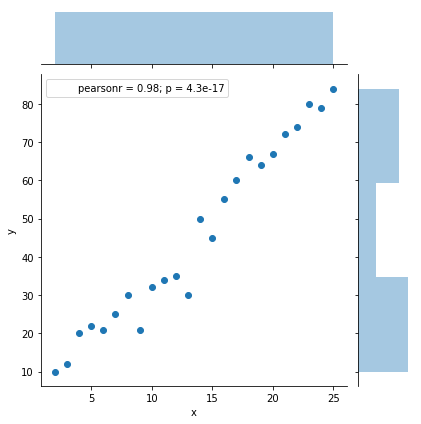

In [83]:
sns.jointplot(df.x, df.y)

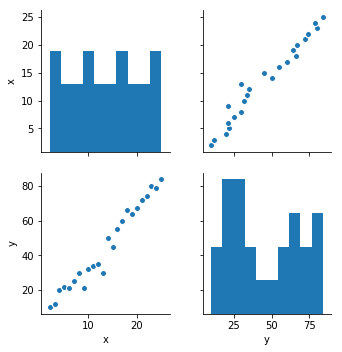

In [84]:
sns.pairplot(df)

In [85]:
df.x.corr(df.y)

0.980741474545724

In [86]:
df.corr()

,x,y
x,1.000000,0.980741
y,0.980741,1.000000


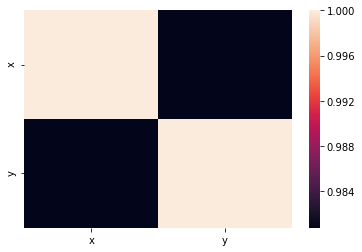

In [87]:
sns.heatmap(df.corr())

In [90]:
import statsmodels.formula.api as smf

In [94]:
lr1 = smf.ols("y ~ x", df).fit()

In [95]:
lr1

In [96]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     554.7
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           4.26e-17
Time:                        09:25:55   Log-Likelihood:                -70.362
No. Observations:                  24   AIC:                             144.7
Df Residuals:                      22   BIC:                             147.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8772      2.121      0.414      0.683      -3.522       5.276
x              3.2930      0.140     23.553      0.000       3.003       3.583
==============================================================================
Omnibus:                       12.237   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.682
Skew:                          -1.382   Prob(JB):                      0.00479
Kurtosis:                       4.743   Cond. No.                         33.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
lr1.f_pvalue

4.2607379969441126e-17

In [99]:
lr1.params

Intercept    0.877246
x            3.293043
dtype: float64

In [102]:
lr1.pvalues

Intercept    6.831967e-01
x            4.260738e-17
dtype: float64

In [104]:
lr1.rsquared

0.9618538398941212

In [105]:
fit.predict(df["y"])

NameError: name 'fit' is not defined

In [108]:
lrpredict = lr1.predict({"x":df.x, "y":df.y})

In [109]:
lrpredict

0      7.463333
1     10.756377
2     14.049420
3     17.342464
4     20.635507
5     23.928551
6     27.221594
7     30.514638
8     33.807681
9     37.100725
10    40.393768
11    43.686812
12    46.979855
13    50.272899
14    53.565942
15    56.858986
16    60.152029
17    63.445072
18    66.738116
19    70.031159
20    73.324203
21    76.617246
22    79.910290
23    83.203333
dtype: float64

C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


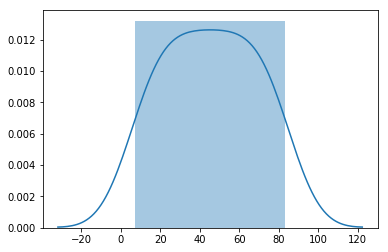

In [110]:
sns.distplot(lrpredict)

# RMSE

In [111]:
from sklearn import metrics

In [112]:
mse = metrics.mean_squared_error(y, lrpredict)

In [113]:
mse

20.607403381642516

In [117]:
from math import sqrt
rmse = sqrt(mse)

In [118]:
rmse

4.539537793833477

In [119]:
lr1.resid

0      2.536667
1      1.243623
2      5.950580
3      4.657536
4      0.364493
5      1.071449
6      2.778406
7     -9.514638
8     -1.807681
9     -3.100725
10    -5.393768
11   -13.686812
12     3.020145
13    -5.272899
14     1.434058
15     3.141014
16     5.847971
17     0.554928
18     0.261884
19     1.968841
20     0.675797
21     3.382754
22    -0.910290
23     0.796667
dtype: float64

C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


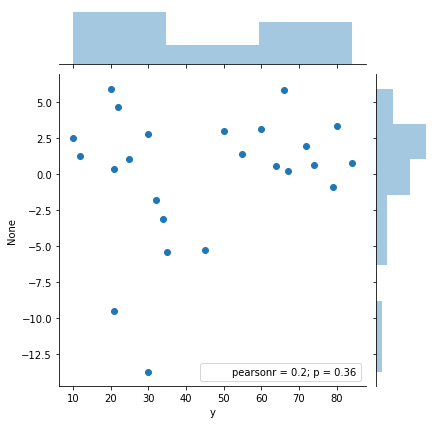

In [120]:
sns.jointplot(df.y, lr1.resid)

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
from sklearn.cross_validation import train_test_split

C:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [142]:
x_train, x_test, y_train, y_test = train_test_split(df[["x"]], df.y, test_size = 0.2)

In [143]:
len(x_train)

19

In [144]:
len(x_test)

5

In [126]:
len(y_train)

19

In [134]:
lin_reg = LinearRegression()
model1 = lin_reg.fit(x_train, y_train)
y_prediction = lin_reg.predict(x_test)

In [135]:
y_prediction

array([17.76364882, 67.46774874, 44.27250211, 64.15414207, 37.64528879])

In [136]:
rmse = sqrt(metrics.mean_squared_error(y_test, y_prediction));rmse

6.858303970155341

In [137]:
metrics.r2_score(y_test, y_prediction)

0.8622412917436489

In [145]:
print("model score:", model1.score(y_test, y_prediction))

ValueError: Expected 2D array, got 1D array instead:
array=[80 84 12 66 45].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [146]:
print("model score:", model1.score(x_test, y_test))

model score: 0.9803577620124587


In [147]:
residuals = y_test - y_prediction

In [148]:
residuals

21    62.236351
23    16.532251
1    -32.272502
16     1.845858
13     7.354711
Name: y, dtype: float64

C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


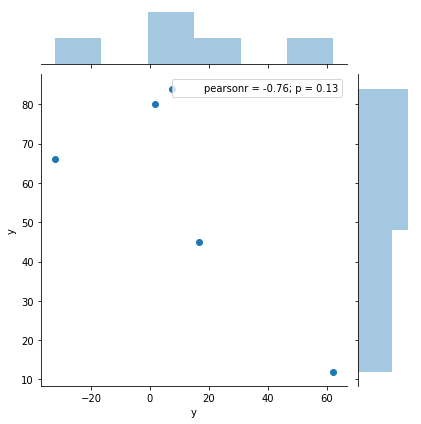

In [149]:
sns.jointplot(residuals, df.y)

In [150]:
from scipy import stats

In [151]:
import pylab

((array([-1.12899754, -0.48565271,  0.        ,  0.48565271,  1.12899754]),
  array([-32.27250211,   1.84585793,   7.35471121,  16.53225126,
          62.23635118])),
 (37.68063631764457, 11.139333895446871, 0.9629955074456502))

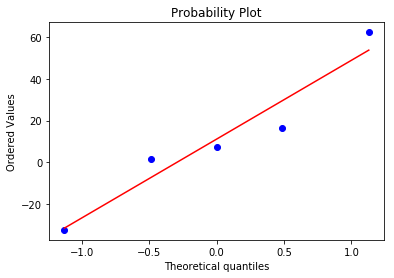

In [152]:
stats.probplot(residuals, dist = "norm", plot = pylab)